In [64]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding as sym_padding
import os
import time
from Crypto.Cipher import DES
from Crypto.Cipher import DES3
from Crypto.Cipher import ARC4
from Crypto.Cipher import PKCS1_OAEP
from Crypto.PublicKey import RSA 

In [65]:
def AES_encrypt(plaintext):

    # Starting time of encrpytion
    start_time = time.time()

    # Generate a random 128-bit key
    key = os.urandom(16)
    # Generate a random IV (Initialization Vector)
    iv = os.urandom(16)

    # Apply PKCS7 padding to plaintext
    padder = sym_padding.PKCS7(algorithms.AES.block_size).padder()
    padded_plaintext = padder.update(plaintext) + padder.finalize()

    # Create AES cipher object
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()

    # Encrypt the padded plaintext
    ciphertext = encryptor.update(padded_plaintext) + encryptor.finalize()

    # Ending time of encrpytion
    end_time = time.time()

    return end_time-start_time

In [66]:
def DES_encrypt(plaintext):

    key = b'superkey'
    # Starting time of encrpytion
    start_time = time.time()

    padding_length = 8 - len(plaintext) % 8
    padded_message = plaintext + bytes([padding_length] * padding_length)

    # Generate a random IV (Initialization Vector)
    iv = os.urandom(8)

    # Create a DES cipher object
    cipher = DES.new(key, DES.MODE_CBC, iv)

    # Encrypt the message
    ciphertext = cipher.encrypt(padded_message)


    # Ending time of encrpytion
    end_time = time.time()

    return end_time-start_time

In [67]:
def THREEDES_encrypt(plaintext):

    key = os.urandom(24)
    # Starting time of encrpytion
    start_time = time.time()

    padding_length = 8 - len(plaintext) % 8
    padded_message = plaintext + bytes([padding_length] * padding_length)

    # Generate a random IV (Initialization Vector)
    iv = os.urandom(8)

    # Create a DES cipher object
    cipher = DES3.new(key, DES3.MODE_CBC, iv)

    # Encrypt the message
    ciphertext = cipher.encrypt(padded_message)


    # Ending time of encrpytion
    end_time = time.time()

    return end_time-start_time

In [68]:
def RC4_encrypt(plaintext):

    # Starting time of encrpytion
    start_time = time.time()
    key = os.urandom(16)
    cipher = ARC4.new(key)

    # Encrypt the message
    ciphertext = cipher.encrypt(plaintext)


    # Ending time of encrpytion
    end_time = time.time()

    return end_time-start_time

In [69]:
def RSA_encrypt(public_key, plaintext):
    start_time = time.time()

    rsa_cipher = PKCS1_OAEP.new(public_key)
    cipher = rsa_cipher.encrypt(plaintext)
   
    end_time = time.time()

    return end_time-start_time

In [90]:
avg = []
for x in range(5):
    avg.append(0)

with open('to_encrypt.txt', 'rb') as f:
    plaintext = f.read()

for x in range(100):
    avg[1] += DES_encrypt(plaintext)
    time.sleep(0.01)
print('DES -',round(avg[1]/100,7),'seconds average')

for x in range(100):
    avg[2] += THREEDES_encrypt(plaintext)
    time.sleep(0.01)
print('3DES -',round(avg[2]/100,7),'seconds average')

for x in range(100):
    avg[0] += AES_encrypt(plaintext)
    time.sleep(0.01)
print('AES -',round(avg[0]/100,7),'seconds average')

for x in range(100):
    avg[3] += RC4_encrypt(plaintext)
    time.sleep(0.01)
print('RC4 -',round(avg[3]/100,7),'seconds average')


DES - 0.0168915 seconds average
3DES - 0.0456456 seconds average
AES - 0.0024431 seconds average
RC4 - 0.0029048 seconds average


In [100]:
keypair = RSA.generate(2048)
avg[4]=0
with open('rsae.txt', 'rb') as f:
    rsae = f.read()
#Normal Plaintext is too long for RSA 1024
for x in range(100):
    avg[4] += RSA_encrypt(keypair.publickey(), rsae)
    time.sleep(0.01)
print('RSA -',round((avg[4]/100)*6320,7),'seconds adjusted average')


RSA - 0.0615229 seconds adjusted average


In [101]:
#Adjusting for graph
avg[0] = avg[0]/100
avg[1] = avg[1]/100
avg[2] = avg[2]/100
avg[3] = avg[3]/100
avg[4] = (avg[4]/100)*6320

# All Algorithms times - 

Averaged over 100 runs.

DES - 0.0168915 seconds

3DES - 0.0456456 seconds

AES - 0.0024431 seconds

RC4 - 0.0029048 seconds

RSA - 0.0615229 seconds adjusted

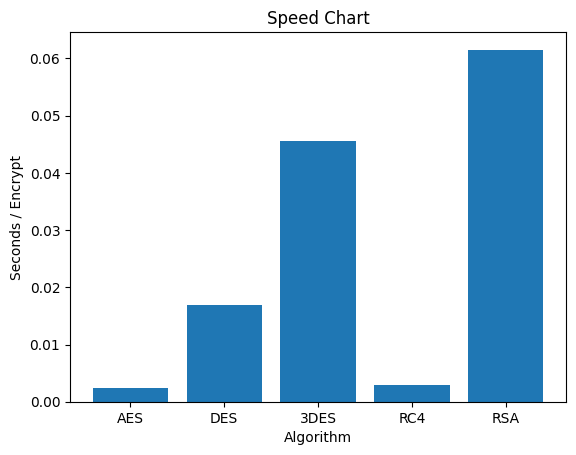

In [107]:
import matplotlib.pyplot as plt

plt.bar(['AES','DES','3DES','RC4','RSA'], avg)
plt.xlabel('Algorithm')
plt.ylabel('Seconds / Encrypt')
plt.title('Speed Chart')
plt.show()

Firstly, AES was run with a more performant library, likely giving it a slight uplift.

Secondly, this is not a highly controlled environment, with variations due to other system processes.

AES is made to be fast and secure, operating on fixed-size blocks with simple substituions, permutations, and XOR. 

RC4 is very fast, but has security vulnerabilities in its key scheduling algorithm. It is fast for being simple like AES in XOR operations on a pseudorandom key.

DES and 3DES are blocks ciphers, being slower than AES due to their smaller block sizes, resulting in more overhead in padding and less possible parallelism.

3DES is notably slower than DES due to just applying DES multiple times, in many rounds. Key expansion for use across the rounds is also slow.

RSA is much slower due to involving complex mathematical operations, such as modualar exponentiation, which is slower than simple XOR operations.
